In [22]:
import numpy as np
from lib.data_loader import get_monks_dataset


X_train, y_train, X_test, y_test = get_monks_dataset(2, one_hot_encode=True)

One-hot encoding MONK-2 dataset...


In [32]:
import matplotlib.pyplot as plt

loss_history = []
accuracy_history = []

# Define network architecture
input_size = X_train.shape[1]
hidden_size = 10  # Number of neurons in hidden layer
output_size = y_train.shape[1]
learning_rate = 0.1
epochs = 10000

# Initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)
b2 = np.zeros((1, output_size))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x <= 0, 0, 1)

def forward_propagation(X):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = relu(Z2)
    return Z1, A1, Z2, A2


def backward_propagation(X, y, Z1, A1, Z2, A2):
    global W1, b1, W2, b2

    m = X.shape[0]
    dZ2 = A2 - y
    dW2 = (1 / m) * np.dot(A1.T, dZ2)
    db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)

    dZ1 = np.dot(dZ2, W2.T) * relu_derivative(A1)
    dW1 = (1 / m) * np.dot(X.T, dZ1)
    db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2


def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    epsilon = 1e-8  # small value to avoid division by zero
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # clip predictions to avoid log(0)
    loss = -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / m
    loss_history.append(loss)
    return loss


def compute_accuracy(y_true, y_pred):
    predictions = (y_pred > 0.5).astype(int)
    accuracy = np.mean(predictions == y_true)
    accuracy_history.append(accuracy)
    return accuracy

# Training loop
for epoch in range(epochs):
    Z1, A1, Z2, A2 = forward_propagation(X_train)
    backward_propagation(X_train, y_train, Z1, A1, Z2, A2)

    if epoch % 100 == 0:
        loss = compute_loss(y_train, A2)
        accuracy = compute_accuracy(y_train, A2)
        print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
        
_, _, _, A2_test = forward_propagation(X_test)
predictions = (A2_test > 0.5).astype(int)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 0, Loss: 3.4845, Accuracy: 0.5799
Epoch 100, Loss: 0.5985, Accuracy: 0.6864
Epoch 200, Loss: 0.5430, Accuracy: 0.7337
Epoch 300, Loss: 0.4901, Accuracy: 0.7456
Epoch 400, Loss: 0.4147, Accuracy: 0.7929
Epoch 500, Loss: 0.3087, Accuracy: 0.8876
Epoch 600, Loss: 0.2072, Accuracy: 0.9586
Epoch 700, Loss: 0.1380, Accuracy: 0.9941
Epoch 800, Loss: 0.0866, Accuracy: 1.0000
Epoch 900, Loss: 0.0546, Accuracy: 1.0000
Epoch 1000, Loss: 0.0363, Accuracy: 1.0000
Epoch 1100, Loss: 0.0251, Accuracy: 1.0000
Epoch 1200, Loss: 0.0182, Accuracy: 1.0000
Epoch 1300, Loss: 0.0141, Accuracy: 1.0000
Epoch 1400, Loss: 0.0117, Accuracy: 1.0000
Epoch 1500, Loss: 0.0101, Accuracy: 1.0000
Epoch 1600, Loss: 0.0089, Accuracy: 1.0000
Epoch 1700, Loss: 0.0081, Accuracy: 1.0000
Epoch 1800, Loss: 0.0073, Accuracy: 1.0000
Epoch 1900, Loss: 0.0067, Accuracy: 1.0000
Epoch 2000, Loss: 0.0063, Accuracy: 1.0000
Epoch 2100, Loss: 0.0060, Accuracy: 1.0000
Epoch 2200, Loss: 0.0056, Accuracy: 1.0000
Epoch 2300, Loss: 0.005

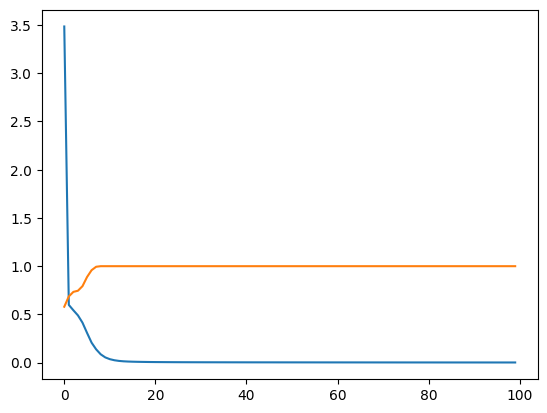

In [35]:
plt.plot(loss_history)
plt.plot(accuracy_history)